Hello Spencer!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# This is a project to identify patterns that determine whether a game succeeds or not. This will allow me to spot potential big winners and plan advertising campaigns for 2017

## Importing the packages I need

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st



#### Importing the dataframe as games

In [3]:
games = pd.read_csv('moved_games.csv')

#### Checking the dataframe

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### changing the column names to lowercase

In [6]:
games.columns = games.columns.str.lower()

In [7]:
games.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1518,Pokemon Ranger: Guardian Signs,DS,2010.0,Role-Playing,0.50,0.16,0.58,0.05,68.0,8.2,E
11826,Cartoon Network: Punch Time Explosion XL,X360,2011.0,Fighting,0.07,0.00,0.00,0.01,NaN,NaN,NaN
10227,AKB48+Me,3DS,2012.0,Action,0.00,0.00,0.11,0.00,NaN,NaN,NaN
9907,Crime Killer,PS,1998.0,Racing,0.07,0.04,0.00,0.01,NaN,NaN,NaN
2717,Nintendo Presents: New Style Boutique 2 - Fash...,3DS,2015.0,Misc,0.03,0.66,0.02,0.04,NaN,NaN,NaN
3965,Unit 13,PSV,2012.0,Shooter,0.25,0.13,0.04,0.07,71.0,7.5,T
249,Tony Hawk's Pro Skater 3,PS2,2001.0,Sports,2.66,1.29,0.01,0.46,97.0,7.5,T
13233,Impossible Mission,PSP,2007.0,Platform,0.00,0.04,0.00,0.01,NaN,NaN,NaN
15249,Jojo's Bizarre Adventure,PS,1999.0,Fighting,0.01,0.01,0.00,0.00,NaN,NaN,NaN
11459,Little League World Series Baseball 2010,PS3,2010.0,Sports,0.07,0.00,0.00,0.01,61.0,tbd,E


#### Checking how many values are missing in year of release

In [8]:
missing_year_of_release = games['year_of_release'].isnull().sum()


In [9]:
missing_year_of_release

269

#### Getting rid of the NaN values in year of release because it is not a significant amount and needs to be gone for correct data analysis

In [10]:
games_clean = games.dropna(subset=['year_of_release'])

In [11]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### converting year of release column to an intiger 

In [12]:
games_clean = games_clean.copy()

In [13]:
games_clean['year_of_release'] = games_clean['year_of_release'].astype(int)

In [14]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#### Checking the user_score column for unique values to convert it to a float

In [15]:
print(games_clean['user_score'].unique())


['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


#### Changing tbd to NaN

In [16]:
games_clean['user_score'] = games_clean['user_score'].replace('tbd', np.nan)


#### Changing user score column to a float

In [17]:
games_clean['user_score'] = games_clean['user_score'].astype(float)


In [18]:
games_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good initial review and preprocessing.
</div>

### Making a new column for the total sales of the game

In [18]:
games_clean['total_sales'] = games_clean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [19]:
games_clean

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Making a bar chart showing the total amount of sales in each year

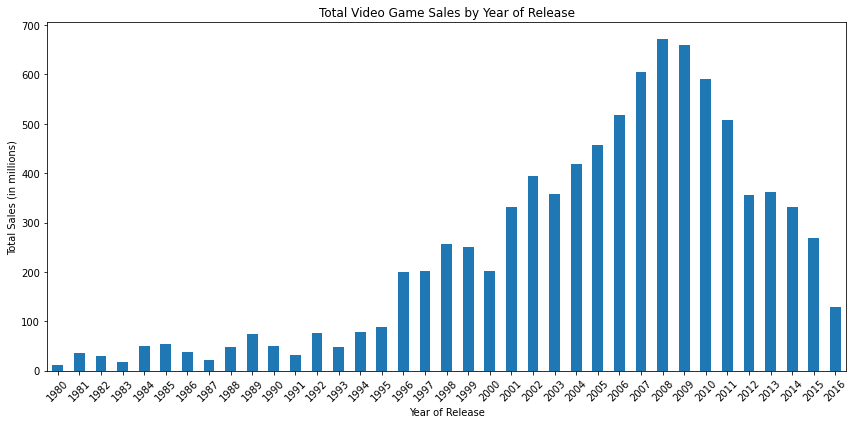

In [20]:
yearly_sales = games_clean.groupby('year_of_release')['total_sales'].sum()
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar')
plt.title('Total Video Game Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### Checking to see if there is a correlation to how many games came out in 2007-2010 and the sales

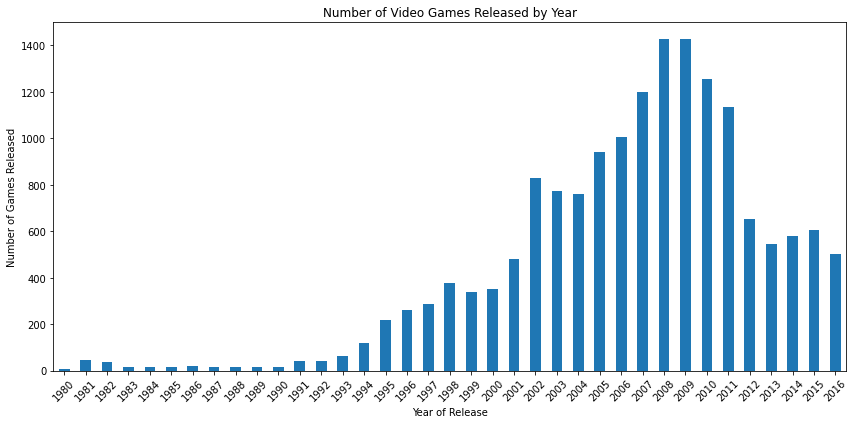

In [21]:
games_per_year = games_clean.groupby('year_of_release').size()

plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Number of Video Games Released by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### Looks like a lot of games came out during that time as well

#### Checking to see which platform has the most amount of sales

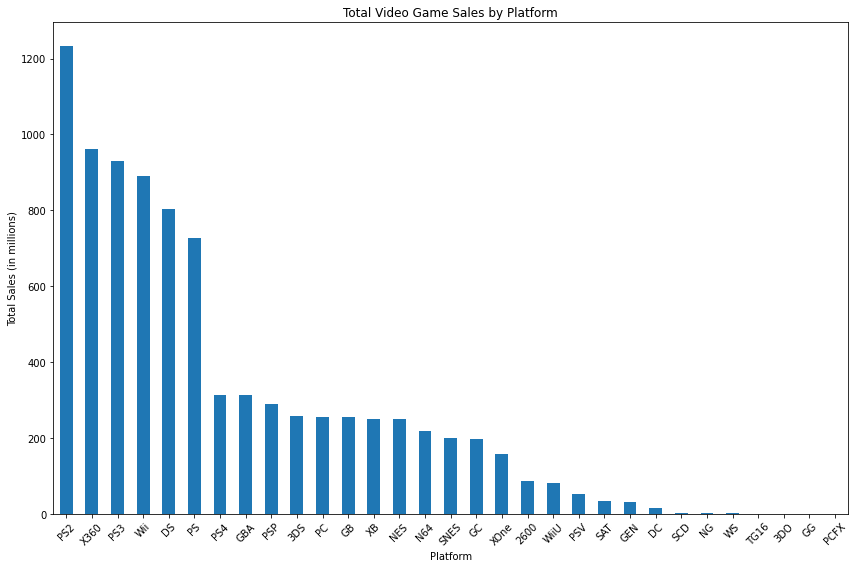

In [22]:
platform_sales = games_clean.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
platform_sales.plot(kind='bar')
plt.title('Total Video Game Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Checking to see the top 5 platforms and how they performed throughout the years

In [23]:
platform_yearly_sales = games_clean.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

<Figure size 1008x576 with 0 Axes>

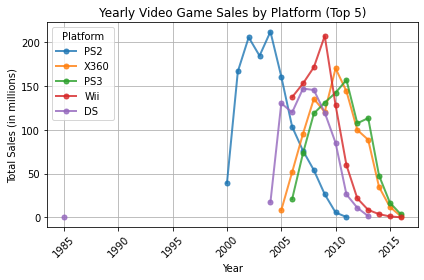

In [24]:
top_platforms = games_clean.groupby('platform')['total_sales'].sum().nlargest(5).index

top_platform_yearly_sales = platform_yearly_sales[top_platforms]

plt.figure(figsize=(14, 8))
top_platform_yearly_sales.plot(kind='line', marker='o', markersize=5, linewidth=2, alpha=0.8)
plt.title('Yearly Video Game Sales by Platform (Top 5)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

#### The top 5 platforms have already faded out. I need to find what is up and coming

#### Checking to see who is selling in 2016

In [25]:
last_year_of_sales = games_clean.groupby('platform')['year_of_release'].max().sort_values(ascending=False)

In [26]:
last_year_of_sales

platform
XOne    2016
3DS     2016
X360    2016
WiiU    2016
Wii     2016
PSV     2016
PC      2016
PS4     2016
PS3     2016
PSP     2015
DS      2013
PS2     2011
DC      2008
XB      2008
GBA     2007
GC      2007
PS      2003
N64     2002
WS      2001
GB      2001
SAT     1999
SNES    1999
PCFX    1996
NG      1996
3DO     1995
TG16    1995
NES     1994
SCD     1994
GEN     1994
GG      1992
2600    1989
Name: year_of_release, dtype: int64

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice visialization and good conclusions.
</div>

### Dropping any platform that does not have a sale in 2016 and creating a new dataframe games_with_2016_sales

In [27]:
games_2016 = games_clean[games_clean['year_of_release'] == 2016]

platforms_with_2016_sales = games_2016['platform'].unique()
games_with_2016_sales = games_clean[games_clean['platform'].isin(platforms_with_2016_sales)]




#### Taking a sample of the new dataframe to make sure code worked

In [28]:
games_with_2016_sales.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15046,Final Fantasy XIV: Heavensward,PC,2015,Action,0.01,0.01,0.00,0.00,86.0,7.7,T,0.02
4735,Monster Jam: Urban Assault,Wii,2008,Racing,0.38,0.00,0.00,0.03,NaN,7.8,E,0.41
4136,Dynasty Warriors Gundam,PS3,2007,Action,0.14,0.01,0.31,0.02,60.0,6.9,T,0.48
15010,Let's Play Garden,Wii,2010,Simulation,0.02,0.00,0.00,0.00,NaN,NaN,E,0.02
7916,"Ni Hao, Kai-lan: Super Game Day",Wii,2009,Misc,0.17,0.00,0.00,0.01,NaN,8.5,E,0.18
14437,Alia's Carnival! Sacrament,PSV,2015,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
6077,World of Tanks,PC,2011,Shooter,0.00,0.23,0.00,0.05,80.0,3.7,T,0.28
11254,RollerCoaster Tycoon 3: Platinum,PC,2005,Strategy,0.01,0.06,0.00,0.01,NaN,NaN,NaN,0.08
874,Resident Evil 6,X360,2012,Shooter,1.12,0.60,0.07,0.16,67.0,5.0,M,1.95
14183,Diabolik Lovers: Dark Fate,PSV,2015,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


#### Checking info of new dataframe

In [29]:
games_with_2016_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6508 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6508 non-null   object 
 1   platform         6508 non-null   object 
 2   year_of_release  6508 non-null   int64  
 3   genre            6508 non-null   object 
 4   na_sales         6508 non-null   float64
 5   eu_sales         6508 non-null   float64
 6   jp_sales         6508 non-null   float64
 7   other_sales      6508 non-null   float64
 8   critic_score     3761 non-null   float64
 9   user_score       3961 non-null   float64
 10  rating           4618 non-null   object 
 11  total_sales      6508 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 661.0+ KB


### Creating a new line chart of the platforms to get a better view 

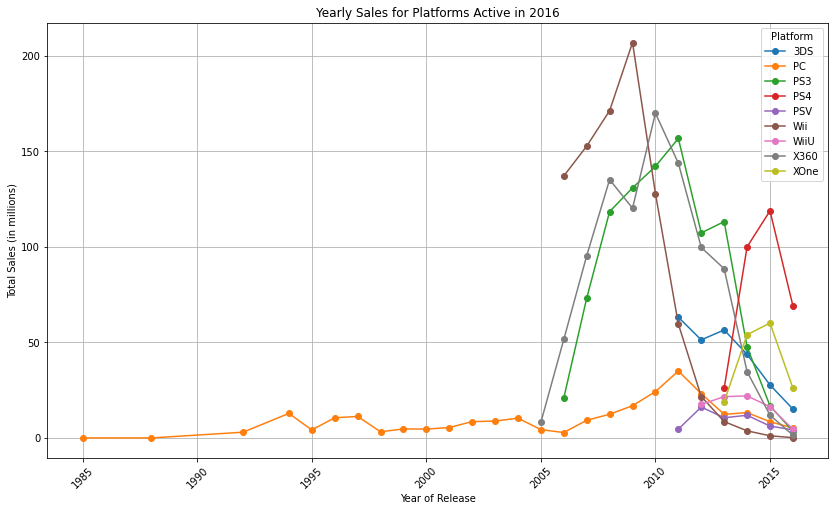

In [30]:
yearly_sales_2016_active_platforms = games_with_2016_sales.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

plt.figure(figsize=(14, 8))
for platform in yearly_sales_2016_active_platforms.columns:
    plt.plot(yearly_sales_2016_active_platforms.index, yearly_sales_2016_active_platforms[platform], label=platform, marker='o')

plt.title('Yearly Sales for Platforms Active in 2016')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

#### Wii is on its way out, X360 is on its way out, PS3 is on its way out. Takes about five years for a platform to reach its peak and get replaced. A new system appears about every 5 years too. PS4 is leading in Sales, followed by XOne, 3ds, WiiU

In [31]:
yearly_sales_2016_active_platforms

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
1985,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,12.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,4.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,10.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,11.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,3.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Looking at the table of the top performers, I am only going to take data from 2013 onward to include all the major gaming platforms of today

## Creating a new dataframe with the top platforms that have sales in 2016 from the years 2013 onward

In [32]:
games_filtered = games_with_2016_sales[games_with_2016_sales['year_of_release'] >= 2013]

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [33]:
games_filtered.sample(15)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
631,NBA 2K15,PS4,2014,Sports,1.47,0.54,0.01,0.43,83.0,7.0,E,2.45
12470,Transformer: Rise of the Dark Spark,WiiU,2014,Action,0.04,0.01,0.00,0.01,NaN,NaN,NaN,0.06
7615,The Legend of Heroes: Trails of Cold Steel,PS3,2013,Role-Playing,0.05,0.02,0.12,0.01,86.0,7.7,T,0.20
563,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,NaN,NaN,NaN,2.68
3448,Skylanders SWAP Force,WiiU,2013,Platform,0.38,0.15,0.00,0.05,89.0,6.0,E10+,0.58
3296,Tearaway,PSV,2013,Adventure,0.14,0.34,0.00,0.14,87.0,8.9,E,0.62
6854,NHL 17,XOne,2016,Sports,0.20,0.01,0.00,0.03,77.0,4.0,E10+,0.24
1018,Kingdom Hearts,PS3,2013,Role-Playing,0.90,0.35,0.25,0.24,NaN,NaN,NaN,1.74
14423,Hajime no Ippo: The Fighting! (2014),PS3,2014,Sports,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
9035,Alien: Isolation,PC,2014,Shooter,0.00,0.14,0.00,0.01,81.0,8.4,M,0.15


In [34]:
games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2158 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2158 non-null   object 
 1   platform         2158 non-null   object 
 2   year_of_release  2158 non-null   int64  
 3   genre            2158 non-null   object 
 4   na_sales         2158 non-null   float64
 5   eu_sales         2158 non-null   float64
 6   jp_sales         2158 non-null   float64
 7   other_sales      2158 non-null   float64
 8   critic_score     990 non-null    float64
 9   user_score       1189 non-null   float64
 10  rating           1247 non-null   object 
 11  total_sales      2158 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 219.2+ KB


In [35]:
platform_sales = games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [36]:
platform_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
Name: total_sales, dtype: float64

#### Since PS3 is becoming obsolete I am going to take the top three potentially profitable platforms: PS4, XOne and 3DS

In [37]:
games_filtered = games_filtered[games_filtered['platform'].isin(['PS4', 'XOne', '3DS'])]


In [38]:
games_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01


In [39]:
games_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 31 to 16677
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             942 non-null    object 
 1   platform         942 non-null    object 
 2   year_of_release  942 non-null    int64  
 3   genre            942 non-null    object 
 4   na_sales         942 non-null    float64
 5   eu_sales         942 non-null    float64
 6   jp_sales         942 non-null    float64
 7   other_sales      942 non-null    float64
 8   critic_score     492 non-null    float64
 9   user_score       519 non-null    float64
 10  rating           545 non-null    object 
 11  total_sales      942 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 95.7+ KB


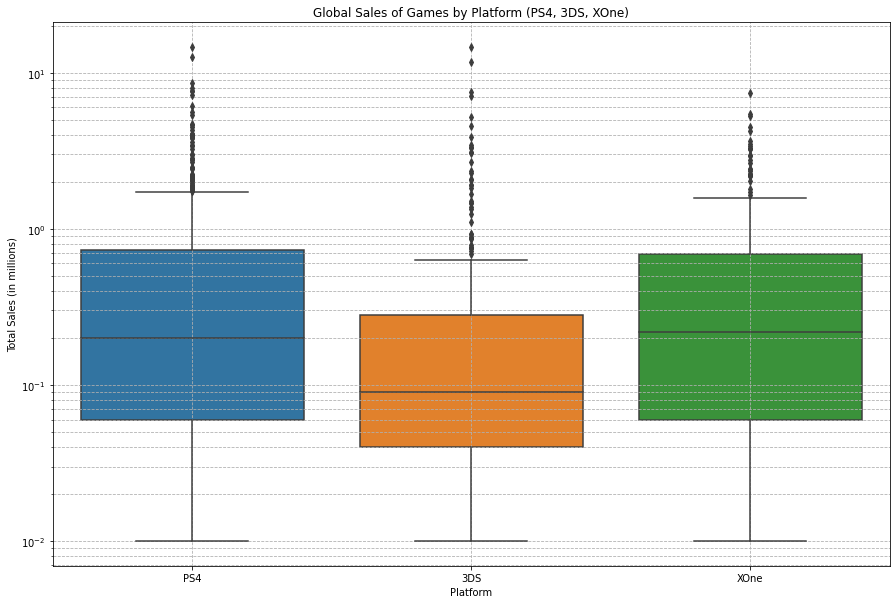

In [40]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=games_filtered, x='platform', y='total_sales')
plt.title('Global Sales of Games by Platform (PS4, 3DS, XOne)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True, which="both", ls="--")
plt.yscale('log')

plt.show()

#### The PS4 and XOne both have similar median range of sales while the 3DS has a lower median range of sales. PS4 and XOne both have higher average sales than the 3DS does. The 3DS is a handheld platform while the others are consoles. The prices of the games could be having an impact. 

### Creating a dataframe to look at X0ne games 

In [41]:
xone_df = games_filtered[(games_filtered['platform'] == 'XOne')]

#### Creating a scatterplot to see how user ratings and sales compares

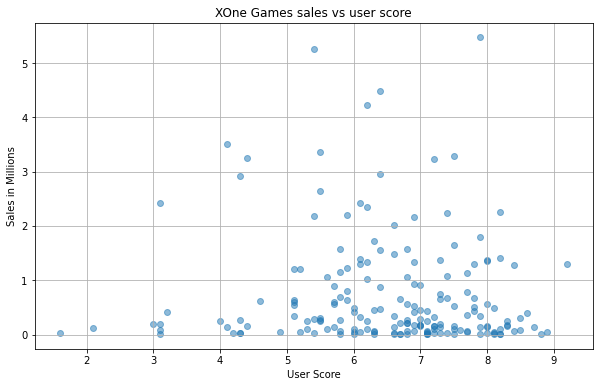

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(xone_df['user_score'], xone_df['total_sales'], alpha=0.5)
plt.title('XOne Games sales vs user score')
plt.xlabel('User Score')
plt.ylabel('Sales in Millions')
plt.grid(True)
plt.show()

#### Just because a game gets a high user review, it does not mean that it will sell a lot of games. Even games with a low user score paid out more than games with a high user score. 

#### Creating a scatterplot to see how sales and critic score compares

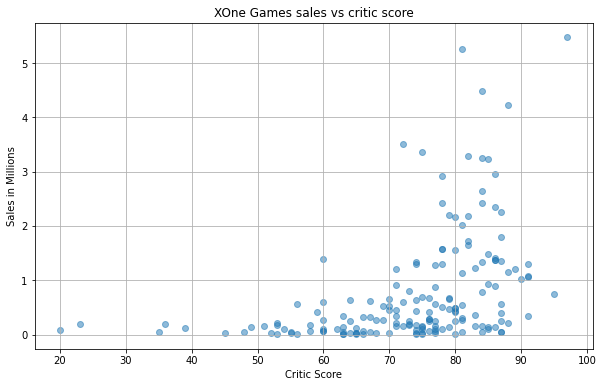

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(xone_df['critic_score'], xone_df['total_sales'], alpha=0.5)
plt.title('XOne Games sales vs critic score')
plt.xlabel('Critic Score')
plt.ylabel('Sales in Millions')
plt.grid(True)
plt.show()

#### Critic score scatterplot looks a lot closer together with a clear upward trend with how well the critics score the game and sales money. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

## Creating a dataframe to look at the total sales of games between the same game on the top three platforms

In [44]:
multiplatform_games = games_filtered['name'].value_counts()[games_filtered['name'].value_counts() > 1].index.tolist()





In [45]:
multiplatform_df = games_filtered[games_filtered['name'].isin(multiplatform_games)]


In [46]:
multiplatform_sales = multiplatform_df.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').reset_index()


In [47]:
multiplatform_sales.dropna()

platform,name,3DS,PS4,XOne
1,Adventure Time: Finn & Jake Investigations,0.09,0.10,0.05
4,Angry Birds Star Wars,0.33,0.22,0.17
68,FIFA 14,0.23,3.01,1.16
69,FIFA 15,0.46,6.08,2.18
90,LEGO Jurassic World,0.62,0.90,0.66
91,LEGO Marvel Super Heroes,0.89,1.62,1.05
92,LEGO Marvel's Avengers,0.18,0.73,0.34
93,LEGO The Hobbit,0.24,0.60,0.27
94,Lego Batman 3: Beyond Gotham,0.45,0.92,0.44
95,Lego Star Wars: The Force Awakens,0.13,0.71,0.29


#### There are not a lot of times where 3DS outperforms PS4 and XOne in sales. And it looks like PS4 outsells XOne in all of these games. 

In [48]:
ps4_xone_sales = multiplatform_sales[['name', 'PS4', 'XOne']]


In [49]:
ps4_xone_sales.sample(20)

platform,name,PS4,XOne
174,Sniper Elite 3,0.69,0.34
211,Wasteland 2,0.12,0.06
153,Ride,0.23,0.10
144,Prototype: Biohazard Bundle,0.01,0.01
164,Rugby World Cup 2015,0.06,0.02
89,LEGO Dimensions,0.73,0.41
81,Guitar Hero Live,0.86,0.55
178,Teenage Mutant Ninja Turtles: Mutants in Manha...,0.09,0.04
213,Watch Dogs 2,1.13,0.36
138,Plants vs. Zombies: Garden Warfare 2,0.49,0.48


#### Looking at this sample of 20, it looks like some games perform about the same in sales while others perform vastly different. 

### Making a bar graph of the amount of games in each genre

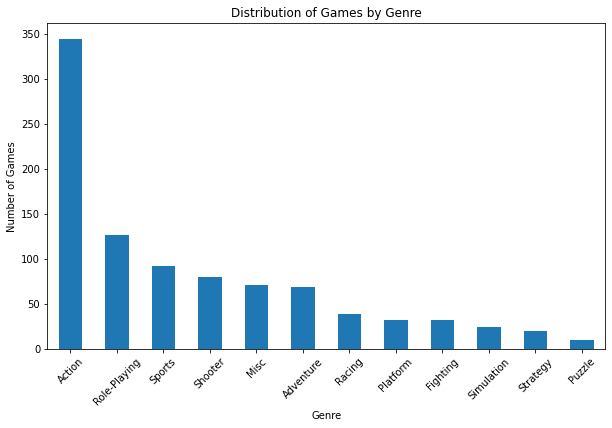

In [50]:
genre_distribution = games_filtered['genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_distribution.plot(kind='bar')
plt.title('Distribution of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()


#### Action has the most amount of games

### Making a bar chart for the total sales of each genre

In [51]:
genre_sales = games_filtered.groupby('genre')['total_sales'].sum().reset_index()
genre_sales_sorted = genre_sales.sort_values('total_sales', ascending=False)


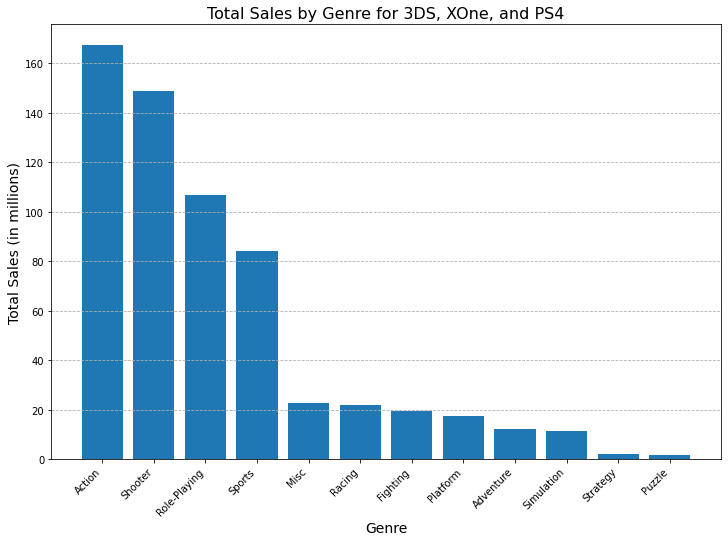

In [52]:
plt.figure(figsize=(12, 8))
plt.bar(genre_sales_sorted['genre'], genre_sales_sorted['total_sales'])
plt.title('Total Sales by Genre for 3DS, XOne, and PS4', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total Sales (in millions)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

plt.show()

#### Action has the most amount of sales with the other top three genres also having the next top three in sales. The rest of the genres did not produce many amount of games and did not account for a lot of revenue

#### Looking at the sales in each country

In [53]:
countries_df = games_with_2016_sales[games_with_2016_sales['year_of_release'] >= 2013]

In [54]:
na_sales_df = countries_df[['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating','na_sales']]
eu_sales_df = countries_df[['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating', 'eu_sales']]
jp_sales_df = countries_df[['name', 'platform', 'genre', 'critic_score', 'user_score', 'rating', 'jp_sales']]

In [55]:
na_sales_df

,name,platform,genre,critic_score,user_score,rating,na_sales
16,Grand Theft Auto V,PS3,Action,97.0,8.2,M,7.02
23,Grand Theft Auto V,X360,Action,97.0,8.1,M,9.66
31,Call of Duty: Black Ops 3,PS4,Shooter,NaN,NaN,NaN,6.03
33,Pokemon X/Pokemon Y,3DS,Role-Playing,NaN,NaN,NaN,5.28
42,Grand Theft Auto V,PS4,Action,97.0,8.3,M,3.96
...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,Adventure,NaN,NaN,NaN,0.00
16707,Aiyoku no Eustia,PSV,Misc,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,Action,NaN,NaN,NaN,0.00
16712,Haitaka no Psychedelica,PSV,Adventure,NaN,NaN,NaN,0.00


In [56]:
eu_sales_df

,name,platform,genre,critic_score,user_score,rating,eu_sales
16,Grand Theft Auto V,PS3,Action,97.0,8.2,M,9.09
23,Grand Theft Auto V,X360,Action,97.0,8.1,M,5.14
31,Call of Duty: Black Ops 3,PS4,Shooter,NaN,NaN,NaN,5.86
33,Pokemon X/Pokemon Y,3DS,Role-Playing,NaN,NaN,NaN,4.19
42,Grand Theft Auto V,PS4,Action,97.0,8.3,M,6.31
...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,Adventure,NaN,NaN,NaN,0.00
16707,Aiyoku no Eustia,PSV,Misc,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,Action,NaN,NaN,NaN,0.00
16712,Haitaka no Psychedelica,PSV,Adventure,NaN,NaN,NaN,0.00


In [57]:
jp_sales_df

,name,platform,genre,critic_score,user_score,rating,jp_sales
16,Grand Theft Auto V,PS3,Action,97.0,8.2,M,0.98
23,Grand Theft Auto V,X360,Action,97.0,8.1,M,0.06
31,Call of Duty: Black Ops 3,PS4,Shooter,NaN,NaN,NaN,0.36
33,Pokemon X/Pokemon Y,3DS,Role-Playing,NaN,NaN,NaN,4.35
42,Grand Theft Auto V,PS4,Action,97.0,8.3,M,0.38
...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,Adventure,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,Misc,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,Action,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,Adventure,NaN,NaN,NaN,0.01


In [58]:
top_platforms_jp = countries_df.groupby('platform')['jp_sales'].sum().nlargest(5).index


In [59]:
top_platforms_jp

Index(['3DS', 'PS3', 'PSV', 'PS4', 'WiiU'], dtype='object', name='platform')

In [60]:
top_platforms_eu = countries_df.groupby('platform')['eu_sales'].sum().nlargest(5).index

In [61]:
top_platforms_eu

Index(['PS4', 'PS3', 'XOne', 'X360', '3DS'], dtype='object', name='platform')

In [62]:
top_platforms_na = countries_df.groupby('platform')['na_sales'].sum().nlargest(5).index

In [63]:
top_platforms_eu

Index(['PS4', 'PS3', 'XOne', 'X360', '3DS'], dtype='object', name='platform')

#### Total sales for each genre in each region


In [64]:
na_genre_sales = na_sales_df.groupby('genre')['na_sales'].sum().reset_index()
eu_genre_sales = eu_sales_df.groupby('genre')['eu_sales'].sum().reset_index()
jp_genre_sales = jp_sales_df.groupby('genre')['jp_sales'].sum().reset_index()

#### Total market sales in each region

In [65]:
total_na_sales = na_genre_sales['na_sales'].sum()
total_eu_sales = eu_genre_sales['eu_sales'].sum()
total_jp_sales = jp_genre_sales['jp_sales'].sum()

#### Market share for each genre in each region

In [66]:
na_genre_sales['market_share_%'] = (na_genre_sales['na_sales'] / total_na_sales) * 100
eu_genre_sales['market_share_%'] = (eu_genre_sales['eu_sales'] / total_eu_sales) * 100
jp_genre_sales['market_share_%'] = (jp_genre_sales['jp_sales'] / total_jp_sales) * 100

In [67]:
na_genre_sales

,genre,na_sales,market_share_%
0,Action,125.83,28.784829
1,Adventure,7.14,1.633344
2,Fighting,15.55,3.557213
3,Misc,27.46,6.281740
4,Platform,17.93,4.101661
5,Puzzle,0.83,0.189871
6,Racing,12.96,2.964725
7,Role-Playing,46.40,10.614448
8,Shooter,109.74,25.104086
9,Simulation,4.75,1.086608


In [68]:
eu_genre_sales

,genre,eu_sales,market_share_%
0,Action,117.87,30.129598
1,Adventure,8.22,2.101173
2,Fighting,8.55,2.185527
3,Misc,20.00,5.112344
4,Platform,15.15,3.872600
5,Puzzle,1.00,0.255617
6,Racing,20.19,5.160911
7,Role-Playing,36.97,9.450167
8,Shooter,87.86,22.458526
9,Simulation,10.84,2.770890


In [69]:
jp_genre_sales

,genre,jp_sales,market_share_%
0,Action,39.65,28.838461
1,Adventure,5.11,3.716634
2,Fighting,7.63,5.549495
3,Misc,9.03,6.567750
4,Platform,4.79,3.483890
5,Puzzle,1.18,0.858244
6,Racing,2.30,1.672849
7,Role-Playing,50.01,36.373554
8,Shooter,6.61,4.807622
9,Simulation,4.52,3.287512


#### Getting the top five genres for each region

In [70]:
top_na_genres = na_genre_sales.sort_values('na_sales', ascending=False).head(5)
top_eu_genres = eu_genre_sales.sort_values('eu_sales', ascending=False).head(5)
top_jp_genres = jp_genre_sales.sort_values('jp_sales', ascending=False).head(5)

In [71]:
top_na_genres

,genre,na_sales,market_share_%
0,Action,125.83,28.784829
8,Shooter,109.74,25.104086
10,Sports,65.27,14.931143
7,Role-Playing,46.40,10.614448
3,Misc,27.46,6.281740


In [72]:
top_eu_genres

,genre,eu_sales,market_share_%
0,Action,117.87,30.129598
8,Shooter,87.86,22.458526
10,Sports,60.34,15.423941
7,Role-Playing,36.97,9.450167
6,Racing,20.19,5.160911


In [73]:
top_jp_genres

,genre,jp_sales,market_share_%
7,Role-Playing,50.01,36.373554
0,Action,39.65,28.838461
3,Misc,9.03,6.567750
2,Fighting,7.63,5.549495
8,Shooter,6.61,4.807622


#### Putting the top region genres together into one dataframe to make a bar graph out of it to compare genre sales

In [74]:
top_na_genres_summary = top_na_genres[['genre', 'na_sales']].assign(region='NA').rename(columns={'na_sales': 'sales'})
top_eu_genres_summary = top_eu_genres[['genre', 'eu_sales']].assign(region='EU').rename(columns={'eu_sales': 'sales'})
top_jp_genres_summary = top_jp_genres[['genre', 'jp_sales']].assign(region='JP').rename(columns={'jp_sales': 'sales'})

In [75]:
region_genre_sales = pd.concat([top_na_genres_summary, top_eu_genres_summary, top_jp_genres_summary])
region_genre_sales.reset_index(drop=True, inplace=True)

In [76]:
region_genre_sales

,genre,sales,region
0,Action,125.83,NA
1,Shooter,109.74,NA
2,Sports,65.27,NA
3,Role-Playing,46.40,NA
4,Misc,27.46,NA
5,Action,117.87,EU
6,Shooter,87.86,EU
7,Sports,60.34,EU
8,Role-Playing,36.97,EU
9,Racing,20.19,EU


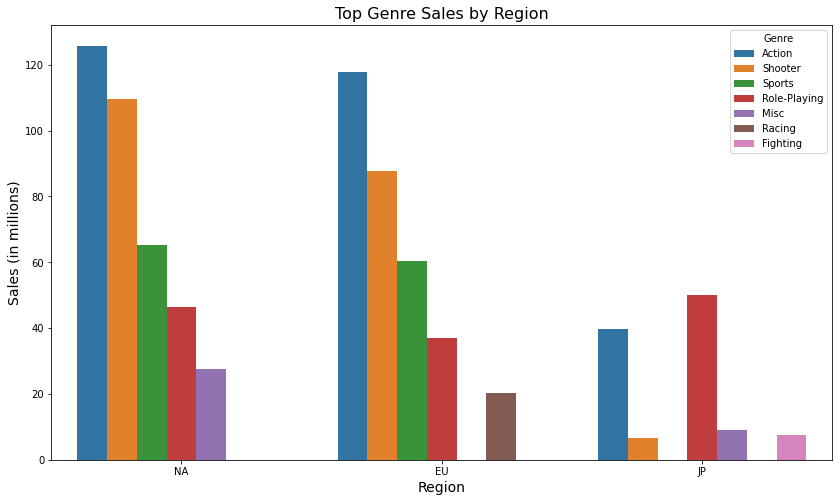

In [77]:
plt.figure(figsize=(14, 8))

sns.barplot(x='region', y='sales', hue='genre', data=region_genre_sales)

plt.title('Top Genre Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales (in millions)', fontsize=14)
plt.legend(title='Genre', loc='upper right')

plt.show()

#### NA and EU outsell JP by a lot with Action and Shooter games being the most bought genres except for in Japan where Role-Playing games are purchased the most. It does not appear that ESRB ratings affect the top genre sales since most action and shooter games are rated Mature and harder to get per say if you were a child who only has access to rated E games. Maybe in Japan where shooter games are the least popular among the top five. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [78]:
xone__user_data = games_clean[games_clean['platform'] == 'XOne']['user_score'].dropna()
pc_user_data = games_clean[games_clean['platform'] == 'PC']['user_score'].dropna()


In [79]:
avg_xone_user = xone__user_data.mean()

In [80]:
avg_xone_user

6.521428571428572

In [81]:
avg_pc_user = pc_user_data.mean()

In [82]:
avg_pc_user

7.065960264900661

#### Testing to see if average user ratings of the Xbox One and PC platforms are the same

In [96]:
alpha = 0.05  
results = st.ttest_ind(xone__user_data, pc_user_data)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.3037979620149106e-05
We reject the null hypothesis


#### The user ratings between the two platforms are not the same

#### Testing to see if the average user ratings between the action and sports genres are the same

In [97]:
action_genre_data = games_clean[games_clean['genre'] == 'Action']['user_score']
sports_genre_data = games_clean[games_clean['genre'] == 'Sports']['user_score']

In [98]:
action_genre_clean = action_genre_data.dropna()
sports_genre_clean = sports_genre_data.dropna()

In [101]:
alpha = 0.05  
results = st.ttest_ind(action_genre_clean, sports_genre_clean)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.06480928064420527
We can't reject the null hypothesis


#### We cannot reject the null hypothesis so the average user ratings between the action and sports genres may be the same. I chose the alpha level of .05 for both tests because that is the normal significance level to use for this kind of study

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

## Conclusion
#### Based on what I have found in this dataset I would plan on advertising for the xbox one console and the ps4 console for 2017 In North America and Eroupe for a shooter/action game. In Japan I would advertise more for a role playing/action type of game on the ps4, 3DS or WiiU since xbox does not seem to be as prevalant in Japan as Europe or North America. 

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok, but it is better to write more detailed conclusion =)
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Spencer , thank you for sending your project. You've done a really good job on it!
    
I'm glad to say that your project has been accepted. Good luck next sprint!
</div>